<a href="https://colab.research.google.com/github/ErfanS99/python_course_SRBIAU/blob/main/ex_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import NumPy for numerical computing and Matplotlib for plotting.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Matplotlib demonstration notebook

This notebook walks through a variety of Matplotlib features using small, self‑contained examples. The goal is to show:

- the **stateful** pyplot interface (`plt.plot`, `plt.subplot`, …)
- the **object‑oriented** interface based on `Figure` and `Axes`
- how to customize colors, line styles, markers, axes ranges, ticks, grids and spines
- how to create different plot types (scatter, histograms, bar charts, etc.)
- how to use 2D color maps and basic 3D plotting

All of the original code cells are kept unchanged; only explanatory comments and markdown text like this have been added.

In [2]:
# Enable inline plotting so that Matplotlib figures appear inside the notebook.

%matplotlib inline

### Inline plotting in Jupyter

The `%matplotlib inline` magic tells Jupyter to render all Matplotlib figures directly below the code cells that create them. Without this, plots might open in a separate window depending on your environment.

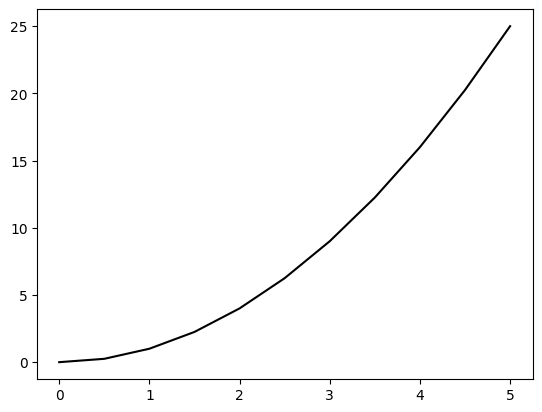

In [71]:
# Create sample x-values and a quadratic y = x**2, then draw a simple black line plot with pyplot.

x = np.linspace(0, 5, 11)
y = x ** 2

plt.plot(x,y,'k')

plt.show()

### First simple line plot

Here we create a 1‑D array `x` using `np.linspace`, compute a quadratic function `y = x**2`, and then plot `y` versus `x`. This is the most basic Matplotlib workflow:

1. create or load data (NumPy is often used for this),
2. call a high‑level plotting function such as `plt.plot`,
3. call `plt.show()` to display the current figure in the notebook.

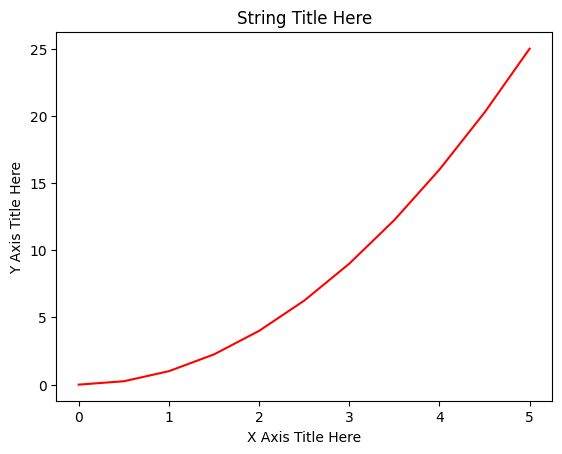

In [72]:
# Plot the same data again, but now add x/y axis labels and a title using pyplot.

plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

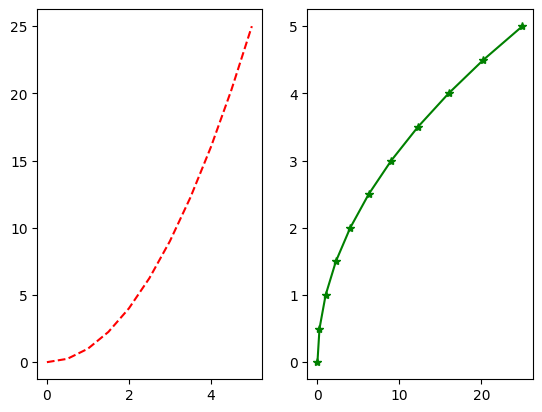

In [73]:
# Use the stateful plt.subplot interface to create a 1x2 grid of subplots and plot y(x) and x(y).

# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

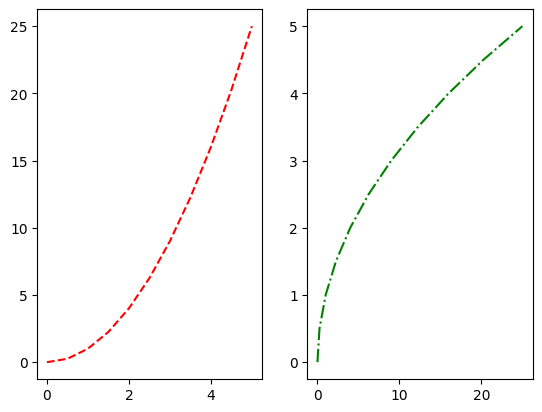

In [74]:
# Create another 1x2 set of subplots to illustrate how only the line style changes between the plots.

plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g-.');

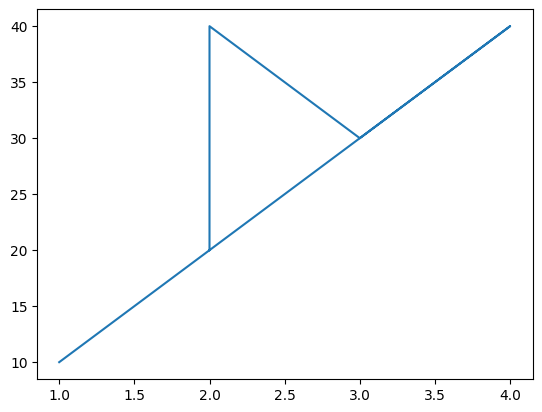

In [75]:
# Show how Matplotlib connects points in the order given, even if x is not sorted or has repeated values.

x = np.array([1,2,2,3,4,2])
y = np.array([10,20,40,30,40,20])
plt.plot(x,y)

#Object Oriented Method

In the next few cells the same types of plots are created using Matplotlib's **object‑oriented (OO) interface**.

Instead of calling functions like `plt.plot` that implicitly operate on a *current* figure and axes, the OO interface makes you:

- create an explicit `Figure` object,
- add one or more `Axes` objects to the figure,
- call methods *on those axes* (for example `axes.plot`, `axes.set_title`, …).

This style scales much better when you want multiple subplots, insets or complex layouts and is generally recommended for non‑trivial scripts and applications.

Text(0.5, 1.0, 'Set Title')

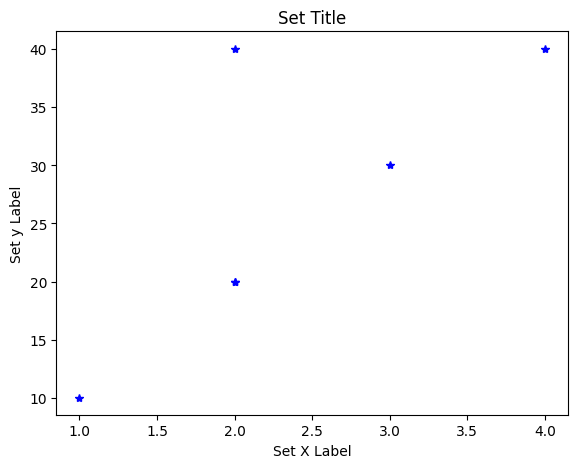

In [76]:
# Create a Figure object and a single Axes and draw a basic plot using the object-oriented API.

# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b*')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

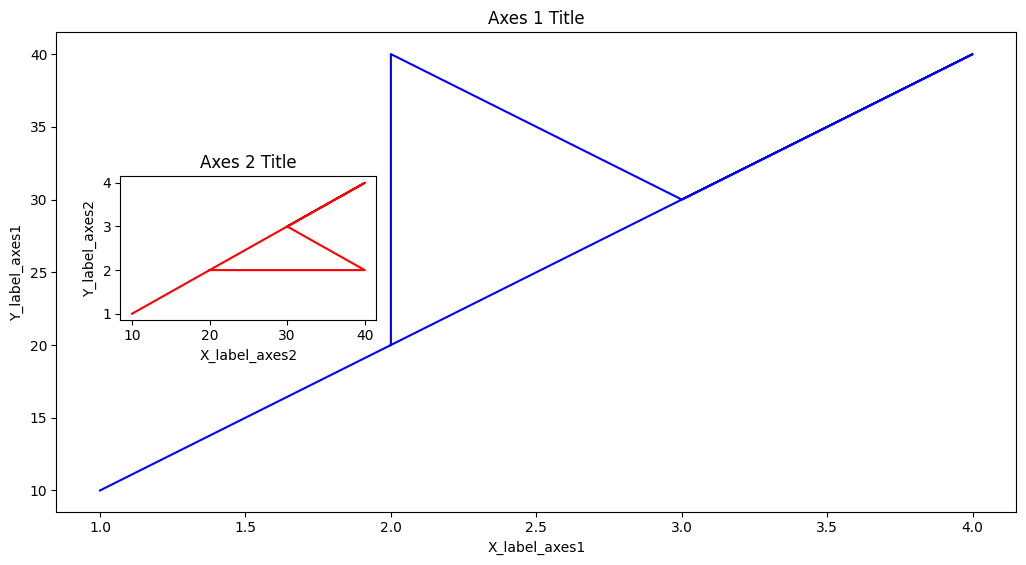

In [77]:
# Create a Figure with two Axes objects: a large main axes and a smaller inset axes, each with its own plot.

# Creates blank canvas
fig = plt.figure()

# Add axes at [left, bottom, width, height] (fractions of figure size)
axes1 = fig.add_axes([0.1, 0.1, 1.5, 1]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

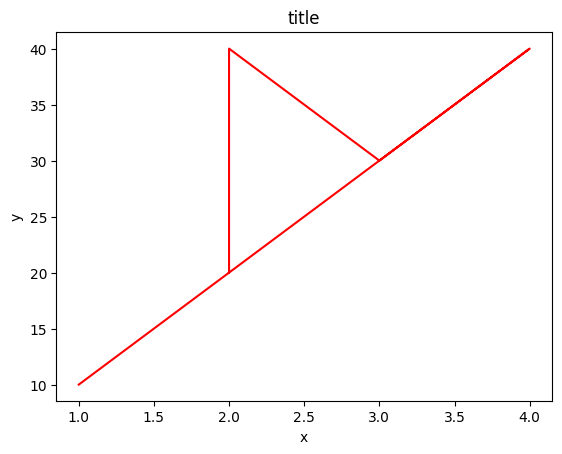

In [78]:
# Use plt.subplots to create a Figure and single Axes in one call, then plot and label the data using the Axes methods.

# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

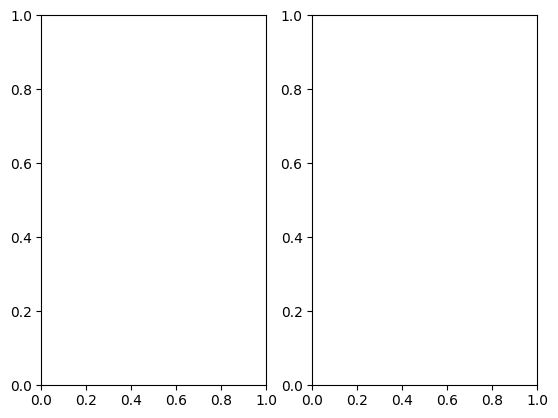

In [79]:
# Prepare a 1x2 grid of empty Axes objects using plt.subplots (no plotting yet).

# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

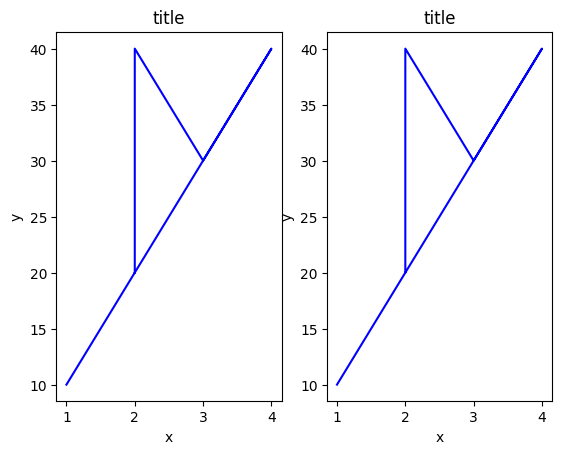

In [80]:
# Loop over both Axes objects, drawing the same line and labeling each subplot.

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object
fig

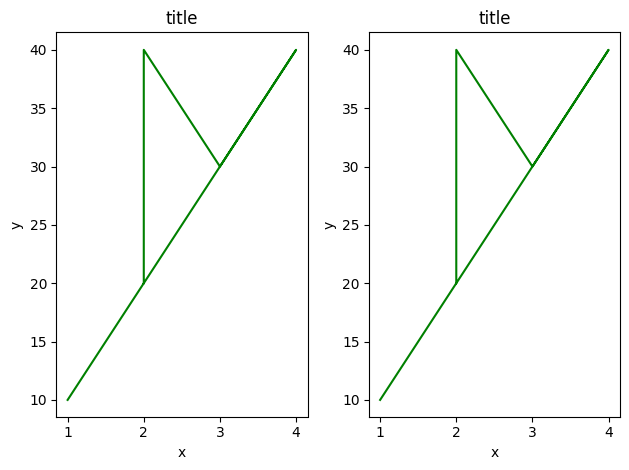

In [81]:
# Repeat the previous subplot example but change the line color and use tight_layout() to reduce overlaps.

fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig
plt.tight_layout()

In [82]:
# Create an empty Figure with a specific physical size and resolution (inches and dots-per-inch).

fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

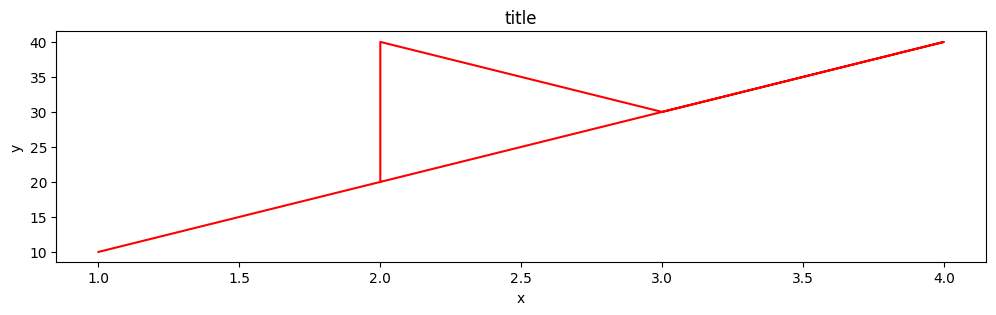

In [83]:
# Create a wide, short Figure and a single Axes to show how figsize affects the aspect of the plot.

fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [84]:
# Save the current Figure to an image file on disk with a higher DPI for better quality.

fig.savefig("filename.png", dpi=200)

In [93]:
x = np.linspace(0,10,10)
y = x**2

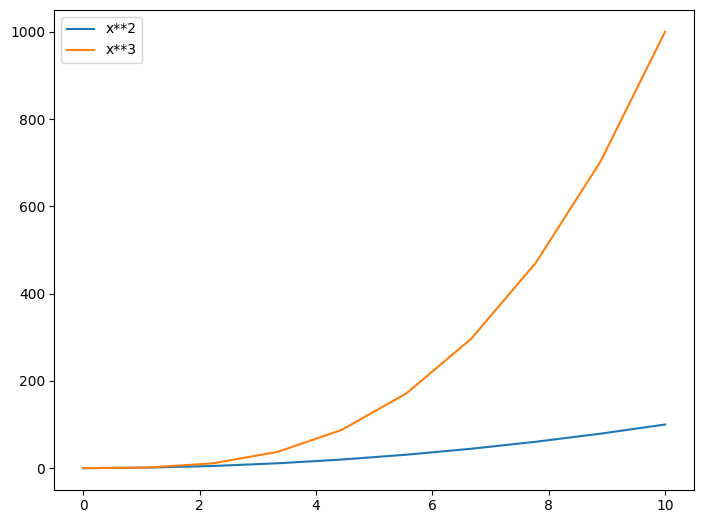

In [94]:
# Plot two curves on the same Axes and add a legend that differentiates the labels 'x**2' and 'x**3'.

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

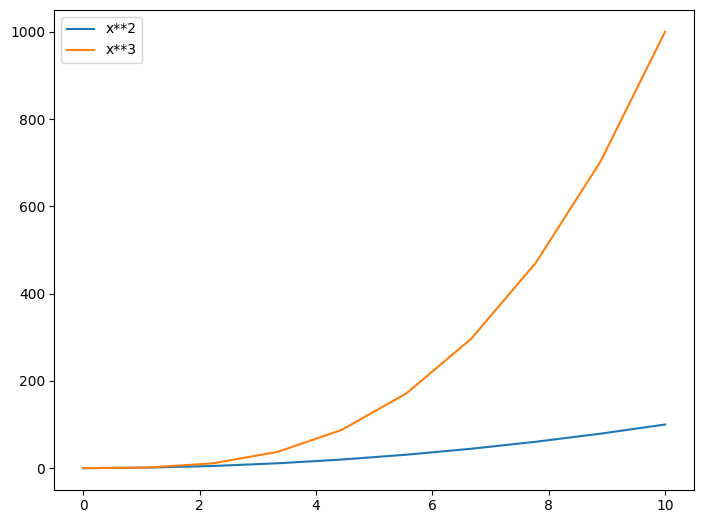

In [95]:
# Experiment with different legend locations and then let Matplotlib automatically choose the best position.

# ax.legend(loc=1) # upper right corner
# ax.legend(loc=2) # upper left corner
# ax.legend(loc=3) # lower left corner
# ax.legend(loc=4) # lower right corner

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

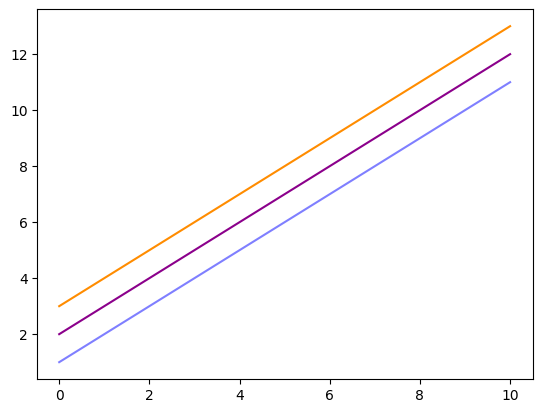

In [96]:
# Demonstrate different ways to specify colors (named colors and hex codes) and basic alpha transparency.

fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code

### Colors, line styles and markers

The next few cells focus on how to control the appearance of plotted lines:

- colors specified by names (e.g. `'blue'`) or hex strings (e.g. `'#FF8C00'`),
- different line widths and line styles (`'-'`, `'--'`, `'-.', `':'`),
- marker types and marker‑specific properties such as size, face color and edge color.

These customizations are purely cosmetic but are crucial for making clear, publication‑quality figures.

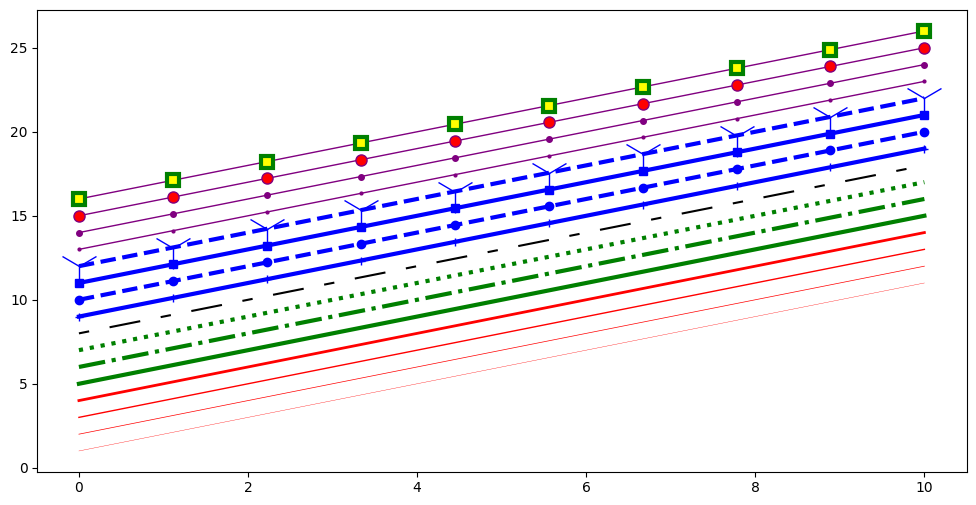

In [97]:
# Show how to vary line width, line style and markers, including a custom dashed pattern.

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1',markersize=30)

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Colors, line styles and markers

The next few cells focus on how to control the appearance of plotted lines:

- colors specified by names (e.g. `'blue'`) or hex strings (e.g. `'#FF8C00'`),
- different line widths and line styles (`'-'`, `'--'`, `'-.', `':'`),
- marker types and marker‑specific properties such as size, face color and edge color.

These customizations are purely cosmetic but are crucial for making clear, publication‑quality figures.

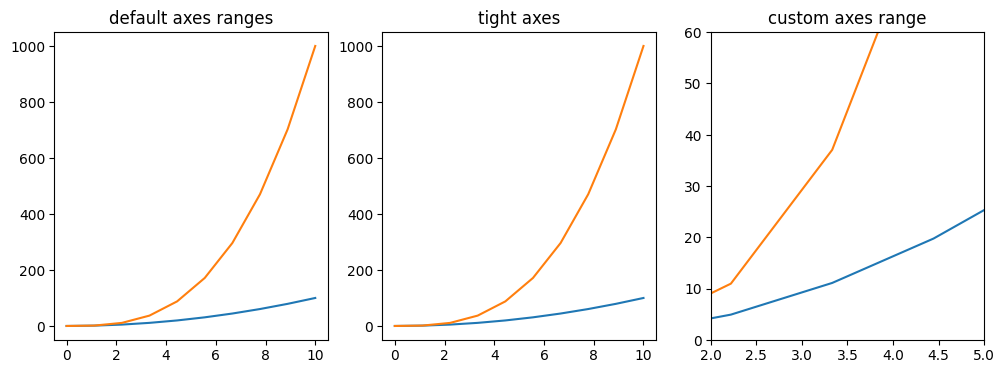

In [98]:
# Compare default axes ranges, tight auto-scaling, and manually specified x/y limits across three subplots.

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

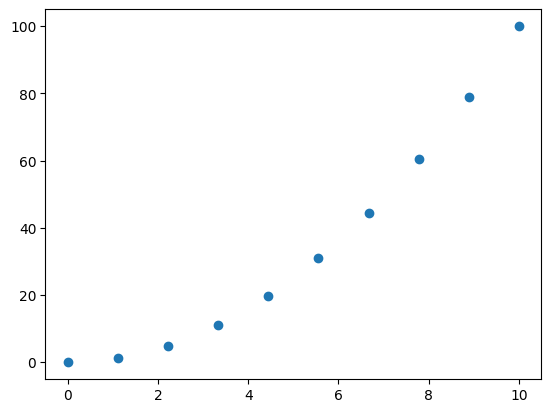

In [99]:
# Create a simple scatter plot of x versus y.
plt.scatter(x,y)

(array([12., 15., 12.,  7.,  1., 14.,  9., 10., 11.,  9.]),
 array([  4. , 102.7, 201.4, 300.1, 398.8, 497.5, 596.2, 694.9, 793.6,
        892.3, 991. ]),
 <BarContainer object of 10 artists>)

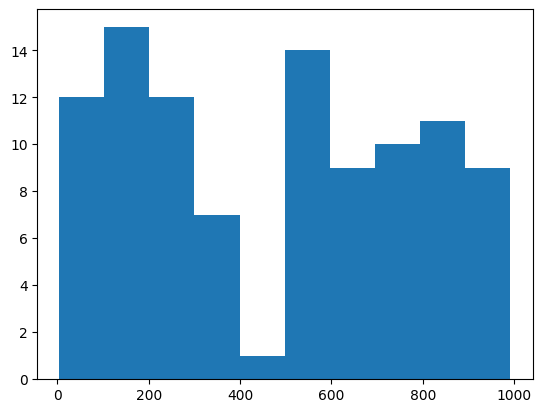

In [100]:
# Draw a histogram of 100 random integers sampled from 1 to 1000.

from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

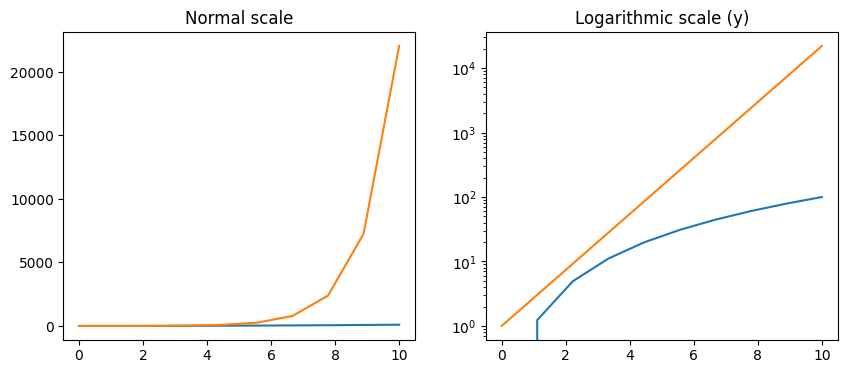

In [101]:
# Compare a normal linear y-axis to a logarithmic y-axis for the same curves on two side-by-side subplots.

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# axes[0].plot(x, x**2,c='r')
# axes[0].plot(x, np.exp(x),c='b')
axes[0].plot(x, x**2,x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Axes limits, scales, ticks and grids

This section demonstrates how to:

- change the visible x/y range with `axis`, `set_xlim` and `set_ylim`,
- switch to logarithmic scales on one axis,
- change tick locations and tick labels (including LaTeX‑style labels),
- use scientific notation formatting for large or small numbers,
- adjust the spacing between ticks, labels and the axes,
- and add or customize background grids.

These tools give you fine‑grained control over how numeric information is presented.

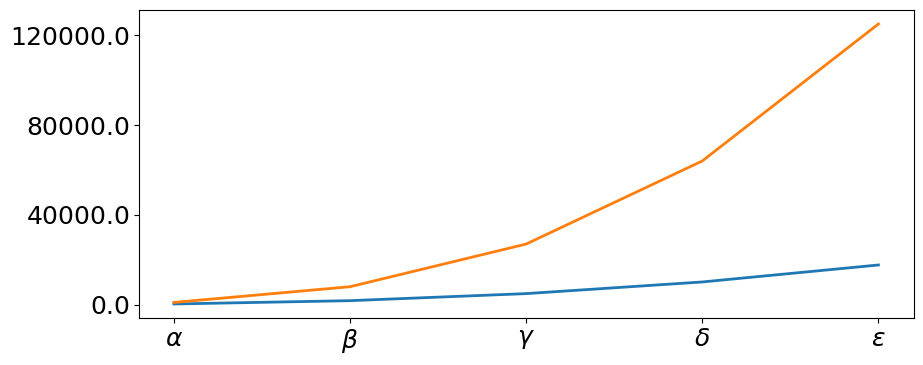

In [135]:
# Manually control x and y tick locations and labels, including LaTeX-style and formatted y-label strings.
x = np.array([10, 20, 30, 40, 50])

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2.5, x, x**3, lw=2)

ax.set_xticks([10, 20, 30, 40, 50])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = np.array([0, 50, 100, 150])*800
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

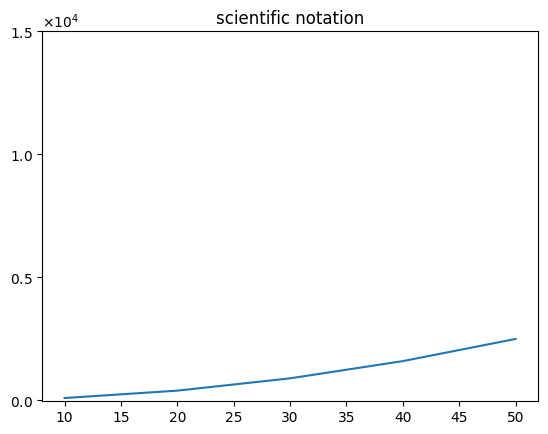

In [136]:
# Format the y-axis ticks using scientific notation with a ScalarFormatter.
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2)
ax.set_title("scientific notation")

ax.set_yticks( np.array([0, 50, 100, 150])*100);

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,1))
ax.yaxis.set_major_formatter(formatter)

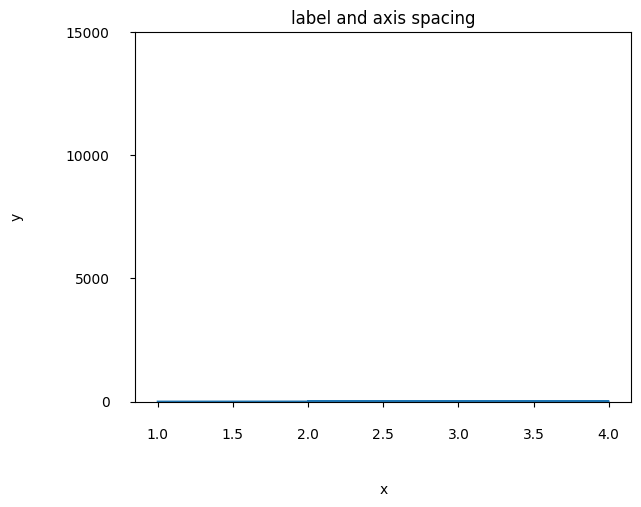

In [27]:
# Adjust the distance between ticks, tick labels, and axis labels, illustrating how to control label padding.

# # distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 15
matplotlib.rcParams['ytick.major.pad'] = 15

fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2)
ax.set_yticks(np.array([0, 50, 100, 150])*100)

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30

ax.set_xlabel("x")
ax.set_ylabel("y");

In [28]:
# Restore the default global tick label padding in Matplotlib's rcParams.

# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

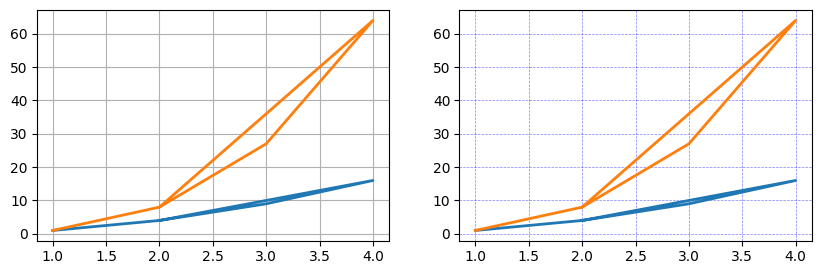

In [29]:
# Demonstrate the effect of enabling a grid and customizing the grid style on two subplots.

fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

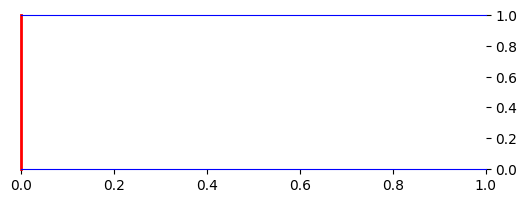

In [30]:
# Customize the appearance of Axes spines (borders), including color, linewidth, and turning a spine off.

fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_right() # only ticks on the left side

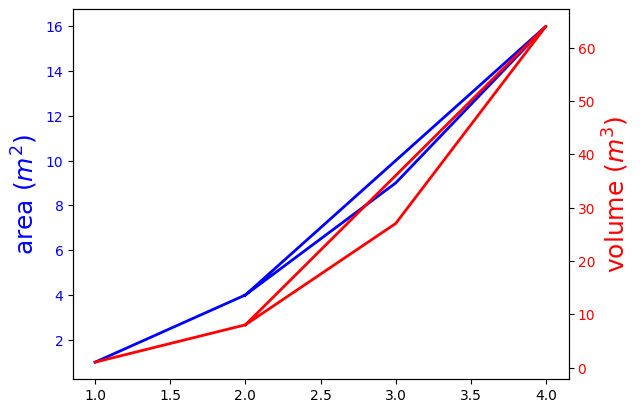

In [31]:
# Create twin y-axes that share the same x-axis but have different scales and colored labels for area and volume.

fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")

for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
# ax3= ax2.twiny()

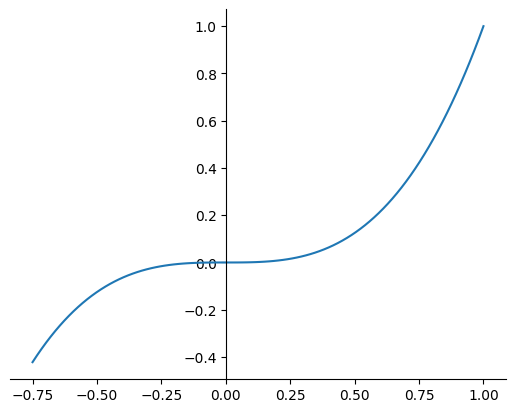

In [32]:
# Reposition the left and bottom spines so that the axes cross at (0,0) and plot a cubic function.

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
# ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
# ax.set_yticks([-1,0,1,2,3])
xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

In [33]:
# Define a small array of integer x-values that will be reused in subsequent plotting examples.

n = np.array([0,1,2,3,4,5])

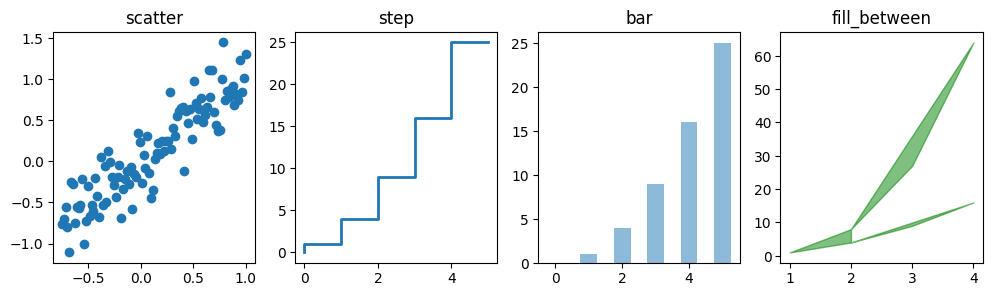

In [34]:
# Show several different plot types—scatter, step, bar, and fill_between—in a single row of subplots.

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5,alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

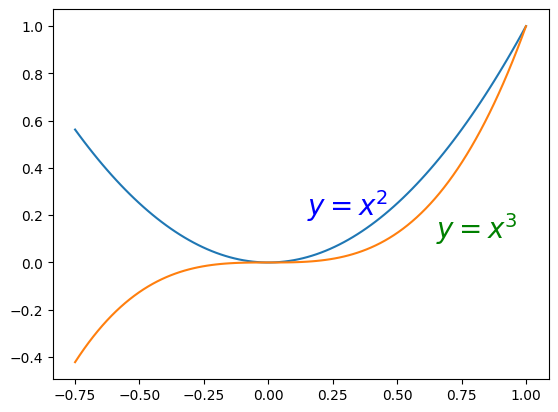

In [35]:
# Annotate a plot with text labels placed at specific data coordinates.

fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

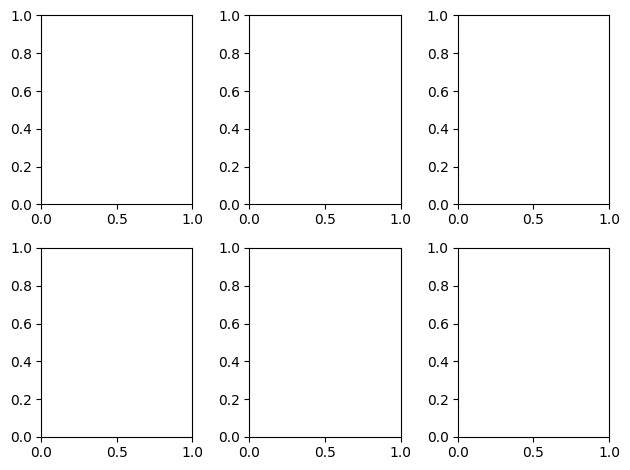

In [36]:
# Create a 2×3 grid of empty Axes as a starting point for more complex layouts.

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

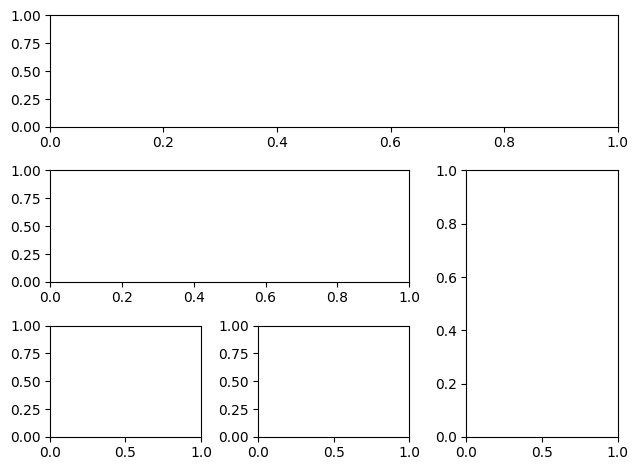

In [37]:
# Use subplot2grid to create a more complex mosaic layout with several Axes in a single Figure.

fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

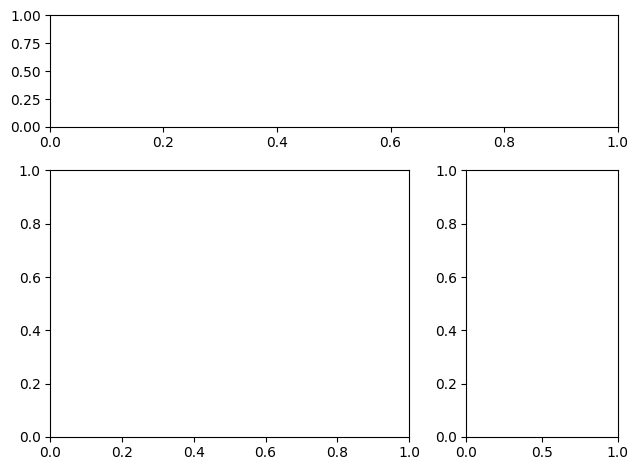

In [38]:
# Create an alternative subplot2grid layout where one axes spans multiple rows and columns.

fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2,rowspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)

fig.tight_layout()

#3D Plot

### 3D and color‑mapped visualizations

The final part of the notebook shows how to visualize a two‑variable function (here called `flux_qubit_potential`) in several different ways:

- as a 2D color map using `pcolor` and `imshow`,
- as contour lines using `contour`,
- as 3D surfaces and wireframes using the 3D Axes from `mpl_toolkits.mplot3d`.

All of these examples use the same underlying grid `(X, Y)` and function values `Z`, but each plotting function emphasizes different aspects of the data.

In [39]:
# Define parameters and a function that computes the flux qubit potential on a grid of phase variables.

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

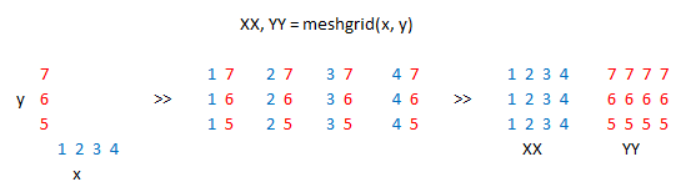

In [40]:
# Create a small 2D grid using np.meshgrid, illustrating how x- and y-coordinates are combined.

xx,yy = np.meshgrid([1,2,3],[7,8,9,10])

In [41]:
# Generate a dense 2D grid of phase variables and evaluate the flux qubit potential to obtain Z-values.

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)

Z = flux_qubit_potential(X, Y).T

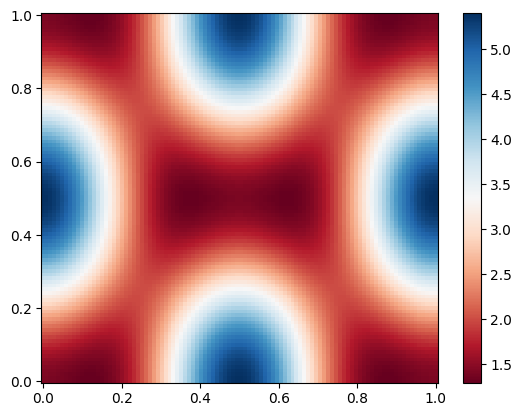

In [42]:
# Visualize the 2D function Z as a pseudo-color plot with a colorbar, using pcolor.

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())

cb = fig.colorbar(p, ax=ax)
# cb.set_interpolation('bilinear')

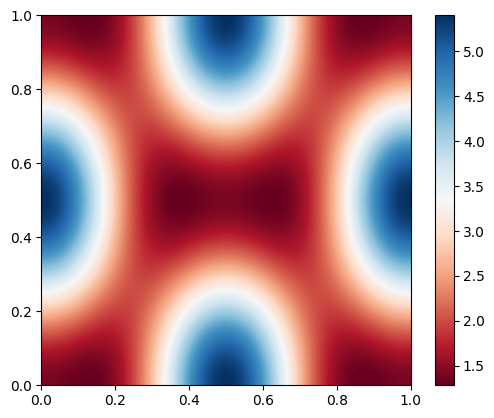

In [43]:
# Visualize the same data Z as a smoothed image using imshow, again with a colorbar.

fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

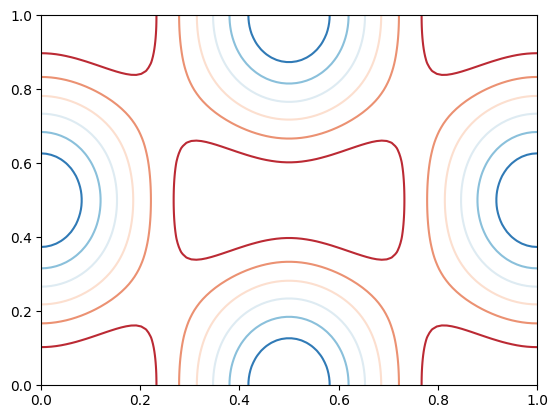

In [44]:
# Visualize Z as contour lines, giving level sets of the function on a 2D plane.

fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

In [45]:
# Import the 3D Axes class needed to create 3D plots with Matplotlib.

from mpl_toolkits.mplot3d.axes3d import Axes3D

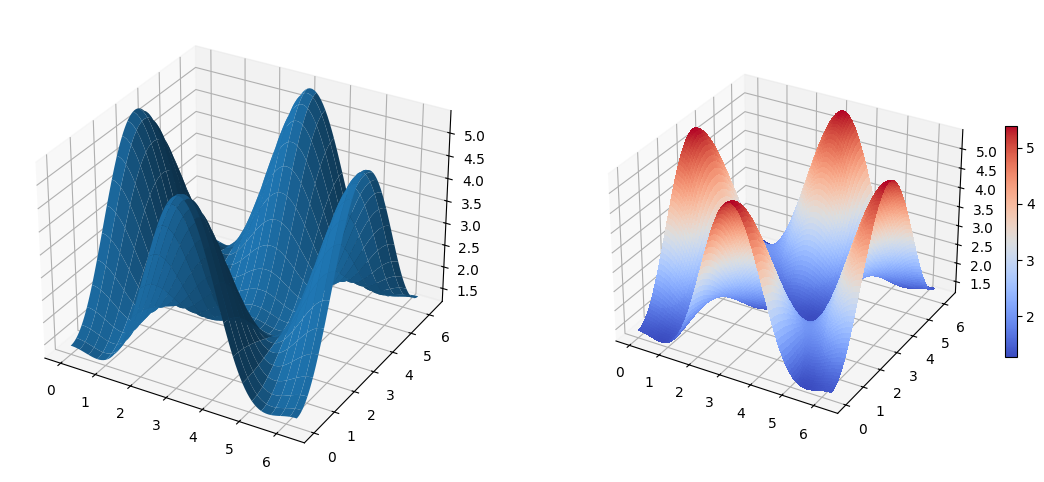

In [46]:
# Create two side-by-side 3D surface plots of Z with different sampling densities and color mapping.

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

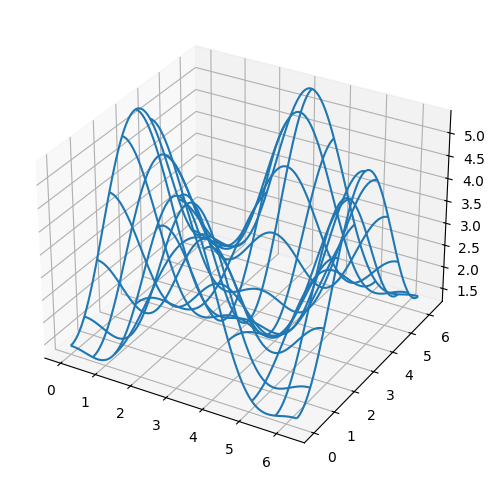

In [47]:
# Create a single 3D wireframe plot of the surface defined by X, Y and Z.

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

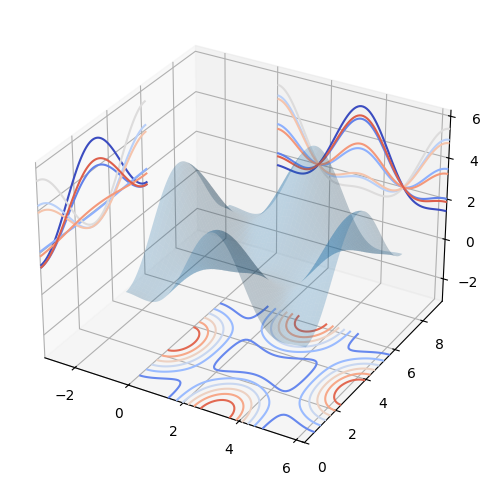

In [48]:
# Plot a 3D surface of Z and project contour lines onto the x-, y- and z-planes.

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);